# Imports

In [41]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import RegressorMixin, TransformerMixin
from sklearn.preprocessing import PowerTransformer, QuantileTransformer, StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression, ElasticNet, ElasticNetCV

from sklearn.compose import ColumnTransformer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import cross_validate, KFold
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import TimeSeriesSplit

# EDA

### Denver (baseline)

In [71]:
denver_df = pd.read_csv('/Users/annafine/Desktop/CLASS_AI_HMK/Project_2/group3-project2-ml/Data/Clean/Denver.csv')
denver_df

,DATE,MarketTempIdx,DaysToClose,DaysOnZillow,ListingPriceCutAmt,ListingPriceCutPct,NewConstructMeanSalePrice,NewConstructSalesCount,SalesCount,SalePrice,MORTGAGE15US,MORTGAGE30US,RATE_DIFFERENCE
0,2018-01,74.0,34.0,28.0,16733.849533,0.133225,537706.730205,682.0,3169.0,397708.149372,3.482,4.033,0.550
1,2018-02,72.0,31.0,22.0,16423.930620,0.130210,545468.537291,657.0,3395.0,400872.926042,3.785,4.330,0.545
2,2018-03,71.0,30.0,19.0,16012.326935,0.153830,549485.507056,992.0,4766.0,403904.017509,3.910,4.444,0.534
3,2018-04,70.0,31.0,16.0,16674.160324,0.178077,555329.230501,859.0,5045.0,406571.265108,3.925,4.468,0.543
4,2018-05,68.0,32.0,17.0,15617.310131,0.220831,543572.326351,907.0,5812.0,409135.348940,4.066,4.586,0.520
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2024-02,74.0,28.0,35.0,17228.124175,0.215376,749677.646739,368.0,2767.0,588450.438544,6.102,6.776,0.674
74,2024-03,72.0,28.0,26.0,18829.755065,0.240464,745504.104784,439.0,3327.0,588917.680727,6.175,6.820,0.645
75,2024-04,68.0,28.0,21.0,19466.333021,0.287527,841958.089514,391.0,3660.0,590109.794947,6.263,6.992,0.730
76,2024-05,62.0,28.0,23.0,18533.910679,0.328747,813332.596257,374.0,4050.0,590809.175996,6.346,7.060,0.714


In [ ]:
# Denver high and low prices

,MarketTempIdx,DaysToClose,DaysOnZillow,ListingPriceCutAmt,ListingPriceCutPct,NewConstructMeanSalePrice,NewConstructSalesCount,SalesCount,SalePrice,MORTGAGE15US,MORTGAGE30US,RATE_DIFFERENCE
MarketTempIdx,1.000000,-0.165770,-0.598320,0.630455,-0.859591,0.004376,-0.226312,0.144371,0.112823,-0.547164,-0.517394,0.193817
DaysToClose,-0.165770,1.000000,0.347575,-0.720016,0.030343,-0.729372,0.358715,0.185519,-0.800294,-0.499034,-0.535523,-0.733442
DaysOnZillow,-0.598320,0.347575,1.000000,-0.620924,0.366388,-0.059633,0.002818,-0.594763,-0.113674,0.367192,0.344278,-0.171670
ListingPriceCutAmt,0.630455,-0.720016,-0.620924,1.000000,-0.399705,0.555811,-0.483597,-0.005301,0.661349,0.039653,0.086033,0.679990
ListingPriceCutPct,-0.859591,0.030343,0.366388,-0.399705,1.000000,0.215745,0.001042,-0.046158,0.125572,0.533686,0.517431,-0.006374


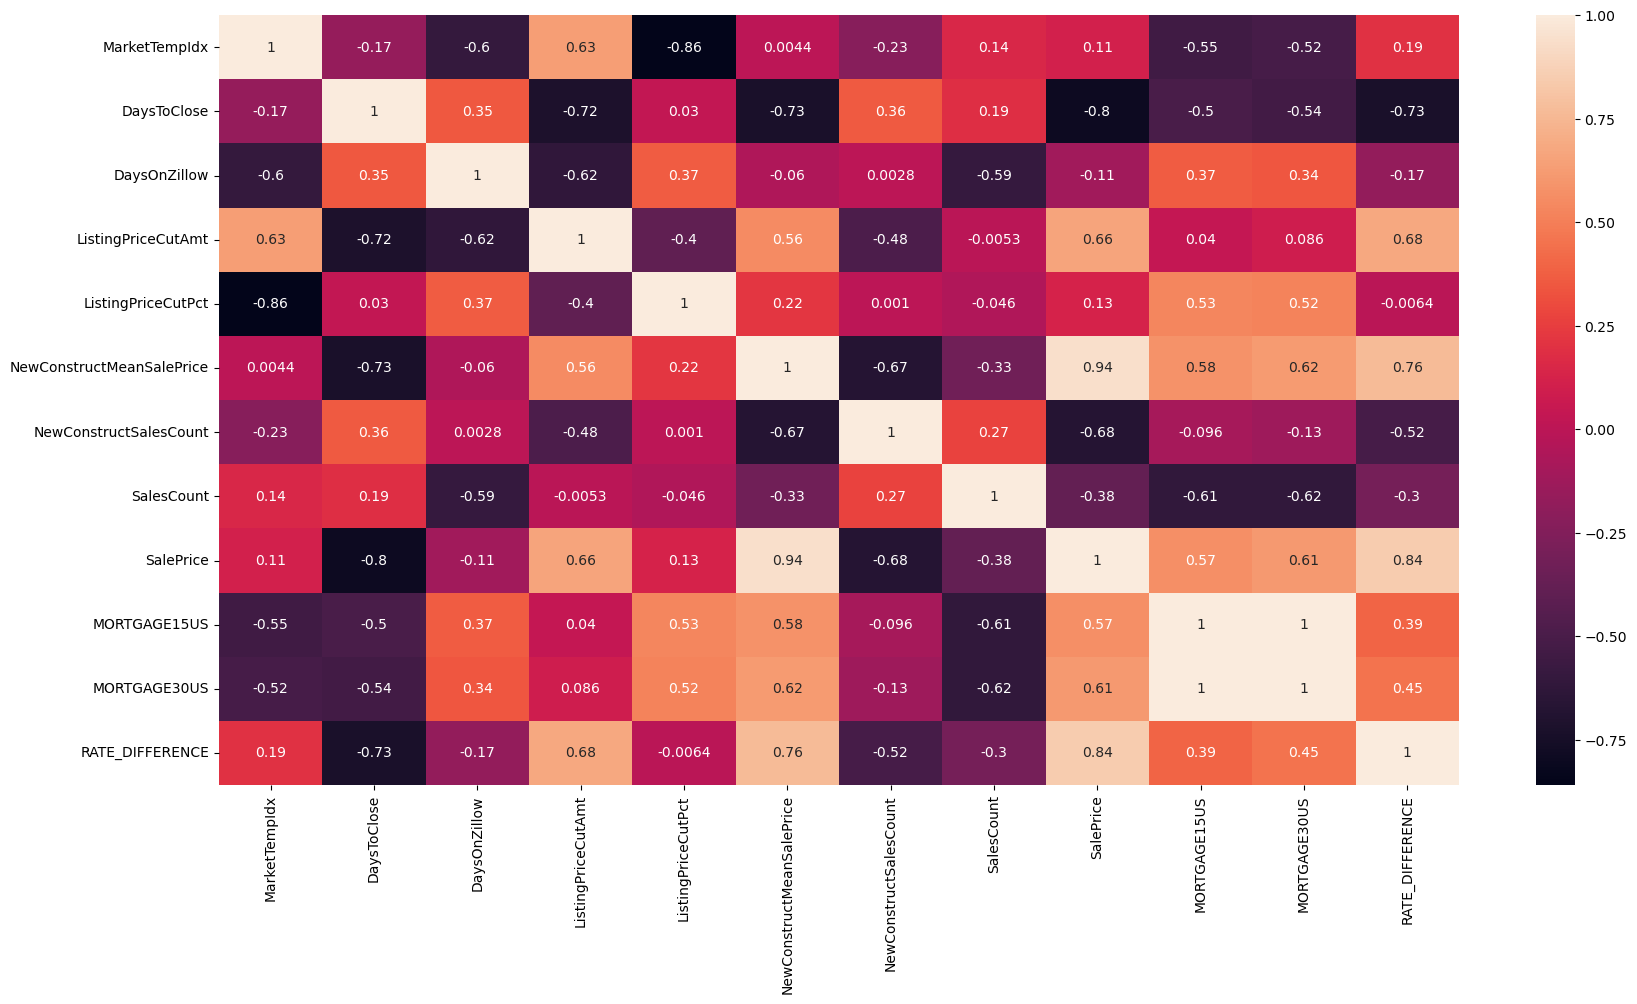

In [72]:
# Denver correlative heatmap

plt.figure(figsize=(20, 10))
denver_df = denver_df.drop('DATE', axis=1).corr()
sns.heatmap(denver_df, annot=True)

denver_df.head()

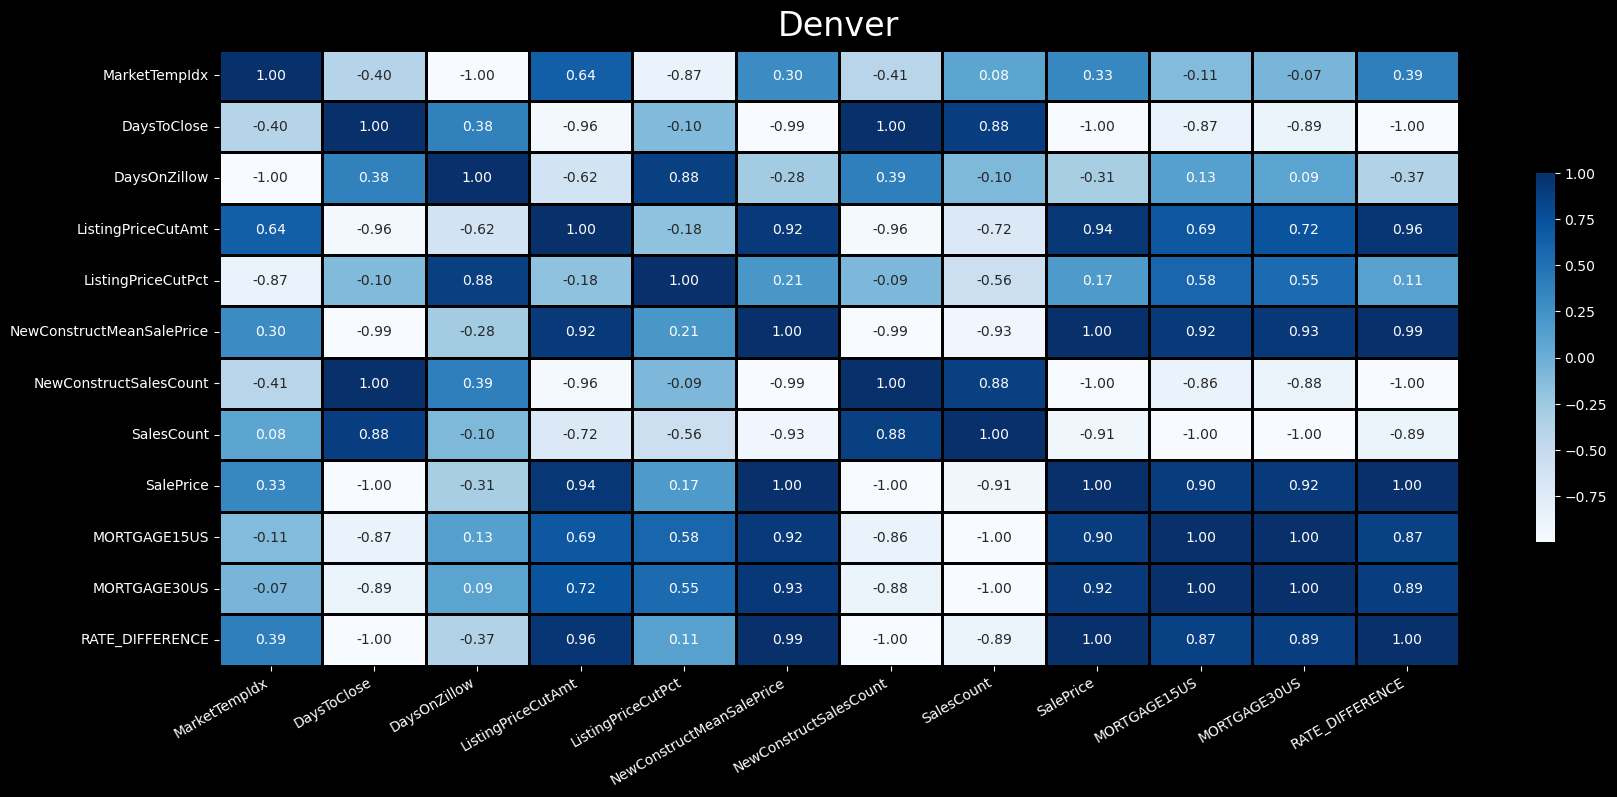

In [76]:
# Denver correlative heatmap
# Create a heatmap
img, ax = plt.subplots(figsize=(20, 8))
denver_df = denver_df.corr()
ax = sns.heatmap(denver_df, annot=True, cmap= 'Blues', annot_kws={"size": 10}, fmt=".2f",linewidths=2, linecolor='black', cbar_kws={'shrink': 0.6})
cbar = ax.collections[0].colorbar

# Update axes to cleaner labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

#Adjust style values to match dark theme
img.patch.set_facecolor('black')
ax.set_facecolor('black')

#Adjust style values to match dark theme
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
cbar.ax.tick_params(colors='white')

# Create output
plt.title('Denver', fontsize=24, pad=10)
plt.show()



### Atlanta

In [30]:
atlanta_df = pd.read_csv('/Users/annafine/Desktop/CLASS_AI_HMK/Project_2/group3-project2-ml/Data/Clean/Atlanta.csv')
atlanta_df

,DATE,MarketTempIdx,DaysToClose,DaysOnZillow,ListingPriceCutAmt,ListingPriceCutPct,NewConstructMeanSalePrice,NewConstructSalesCount,SalesCount,SalePrice,MORTGAGE15US,MORTGAGE30US,RATE_DIFFERENCE
0,2018-01,53.0,35.0,45.0,12315.431363,0.160343,298699.954978,1580.0,6828.0,216365.714317,3.482,4.033,0.550
1,2018-02,52.0,31.0,40.0,13361.053631,0.155572,309807.747078,1885.0,7862.0,218318.581498,3.785,4.330,0.545
2,2018-03,53.0,32.0,35.0,13712.279370,0.170905,325455.767902,2384.0,10600.0,220179.198175,3.910,4.444,0.534
3,2018-04,56.0,32.0,31.0,13456.497756,0.185078,324589.131298,1967.0,10883.0,221743.705815,3.925,4.468,0.543
4,2018-05,57.0,33.0,30.0,13292.195069,0.214794,338943.512924,1977.0,12512.0,223227.417852,4.066,4.586,0.520
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2024-02,59.0,25.0,50.0,13899.210736,0.225485,519554.348501,967.0,5786.0,382993.972281,6.102,6.776,0.674
74,2024-03,57.0,25.0,41.0,15359.677683,0.235984,535044.050216,1155.0,7173.0,384542.454662,6.175,6.820,0.645
75,2024-04,55.0,25.0,41.0,14769.656859,0.254714,550809.895717,1074.0,7872.0,386333.204575,6.263,6.992,0.730
76,2024-05,51.0,25.0,40.0,15102.343887,0.279234,531427.160115,1043.0,8275.0,387488.071665,6.346,7.060,0.714


In [28]:
# Atlanta pricing (high and low)

atl_max = atlanta_df['SalePrice'].max()
atl_max

atl_min = atlanta_df['SalePrice'].min()
atl_min


216365.71431674564

In [19]:
atlanta_df = atlanta_df.set_index('SalePrice', inplace=True)

# atl_top5 = atlanta_df.nlargest(5, 'SalePrice')
# atl_top5
# atl_top5 = atlanta_df['SalePrice'].nlargest(5)

KeyError: "None of ['SalePrice'] are in the columns"

In [ ]:
# Atlanta correlative heatmap

### Charlotte

In [3]:
charlotte_df = pd.read_csv('/Users/annafine/Desktop/CLASS_AI_HMK/Project_2/group3-project2-ml/Data/Clean/Charlotte.csv')
charlotte_df

,DATE,MarketTempIdx,DaysToClose,DaysOnZillow,ListingPriceCutAmt,ListingPriceCutPct,NewConstructMeanSalePrice,NewConstructSalesCount,SalesCount,SalePrice,MORTGAGE15US,MORTGAGE30US,RATE_DIFFERENCE
0,2018-01,53.0,40.0,40.0,11243.116613,0.143878,331002.751220,700.0,2988.0,214397.286147,3.482,4.033,0.550
1,2018-02,52.0,36.0,35.0,12605.449194,0.156792,321081.860710,761.0,3131.0,216017.822527,3.785,4.330,0.545
2,2018-03,53.0,34.0,30.0,12760.508333,0.168021,334866.760000,954.0,4302.0,217678.457946,3.910,4.444,0.534
3,2018-04,54.0,36.0,27.0,13261.422895,0.191695,354226.079731,932.0,4395.0,218995.506605,3.925,4.468,0.543
4,2018-05,54.0,37.0,28.0,12713.534753,0.219585,363532.372678,917.0,4977.0,220144.546519,4.066,4.586,0.520
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2024-02,64.0,33.0,40.0,14916.349080,0.197018,497521.199678,621.0,2555.0,380362.214298,6.102,6.776,0.674
74,2024-03,62.0,32.0,31.0,15022.786413,0.202432,493570.787020,782.0,3084.0,382371.348508,6.175,6.820,0.645
75,2024-04,59.0,33.0,29.0,15763.411191,0.226194,578415.705361,720.0,3377.0,384493.452328,6.263,6.992,0.730
76,2024-05,55.0,33.0,28.0,15643.516741,0.248292,525051.873000,730.0,3732.0,386114.169028,6.346,7.060,0.714


In [ ]:
# Charlotte pricing high and low

In [ ]:
# Charlotte correlative heatmap

### Cincinnati

In [5]:
cincinnati_df = pd.read_csv('/Users/annafine/Desktop/CLASS_AI_HMK/Project_2/group3-project2-ml/Data/Clean/Cincinnati.csv')
cincinnati_df

,DATE,MarketTempIdx,DaysToClose,DaysOnZillow,ListingPriceCutAmt,ListingPriceCutPct,NewConstructMeanSalePrice,NewConstructSalesCount,SalesCount,SalePrice,MORTGAGE15US,MORTGAGE30US,RATE_DIFFERENCE
0,2018-01,42.0,39.0,49.0,8892.789676,0.188391,277393.789308,321.0,1979.0,173346.496800,3.482,4.033,0.550
1,2018-02,43.0,37.0,44.0,9781.125106,0.170206,269154.079051,254.0,1948.0,174075.384919,3.785,4.330,0.545
2,2018-03,46.0,35.0,35.0,9846.737418,0.178320,315383.311005,210.0,2960.0,175200.375854,3.910,4.444,0.534
3,2018-04,50.0,37.0,32.0,11134.855937,0.201177,269780.945055,182.0,3173.0,176430.244009,3.925,4.468,0.543
4,2018-05,51.0,38.0,27.0,11504.665660,0.217566,291332.251613,155.0,3506.0,177773.394767,4.066,4.586,0.520
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2024-02,71.0,31.0,29.0,13009.215712,0.190844,452102.839286,112.0,1675.0,281327.059832,6.102,6.776,0.674
74,2024-03,72.0,30.0,18.0,14352.024752,0.192933,477956.933884,121.0,2166.0,283198.390034,6.175,6.820,0.645
75,2024-04,71.0,33.0,17.0,14308.300714,0.211427,495735.892473,93.0,2452.0,285301.781194,6.263,6.992,0.730
76,2024-05,68.0,31.0,17.0,16067.106364,0.219744,488512.203540,113.0,2800.0,287108.719823,6.346,7.060,0.714


In [ ]:
# Cincinnati pricing high and low

In [ ]:
# Cincinnati correlative heatmap

### Comparitive EDA

In [ ]:
# Compare Denver to Atlanta

In [ ]:
# Compare Denver to Charlotte

In [ ]:
# Compare Denver to Cincinnati

# Machine Learning

In [ ]:
# Find percentage of null values

In [ ]:
# Explore each column with missing values to determine the best fill strategy

In [ ]:
# Fill missing values with "unknown"

In [ ]:
# Use fillna with "unknown"

In [ ]:
# Plot histogram

In [ ]:
# Model

In [ ]:
# Fit

In [ ]:
# Predict

### Total ranges

In [ ]:
# 